In [5]:
import ROOT

In [6]:
import numpy as np
import scipy.optimize as optimize
import sys
!conda install --yes --prefix {sys.prefix} keras

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



In [7]:
!wget -U 'Mozilla/5.0 (X11; U; Linux i686; en-US; rv:1.8.1.6) Gecko/20070802 SeaMonkey/1.1.4' https://arxiv.org/src/1411.4312v6/anc/lester_mt2_bisect.h
ROOT.gInterpreter.ProcessLine('#include "lester_mt2_bisect.h"')
myObj=ROOT.asymm_mt2_lester_bisect()
def calcMt2(V1,V2,t_sig):
    Met_X =(t_sig.met_et*np.cos(t_sig.met_phi))
    Met_Y = (t_sig.met_et*np.sin(t_sig.met_phi))
    return myObj.get_mT2(V1.M(),V1.Px(),V1.Py(),V2.M(),V2.Px(),V2.Py(),Met_X,Met_Y,600,600) 

--2020-05-11 20:44:39--  https://arxiv.org/src/1411.4312v6/anc/lester_mt2_bisect.h
Resolving arxiv.org (arxiv.org)... 128.84.21.199
Connecting to arxiv.org (arxiv.org)|128.84.21.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘lester_mt2_bisect.h.1’

lester_mt2_bisect.h     [ <=>                ]  24.96K  --.-KB/s    in 0.1s    

2020-05-11 20:44:40 (234 KB/s) - ‘lester_mt2_bisect.h.1’ saved [25562]



In [8]:
def filter(t_sig,sig_met_et,sig_mll,sig_mt2):#,sig_eta0,sig_eta1):
    print("loading data now")
    n = 0
    for event in t_sig:
        n += 1
        if(n%10000==0):
            print("Event ", n ,"out of ", t_sig.GetEntries())
        ##triggered by single electron or muon
        if(t_sig.trigE == True or t_sig.trigM == True): 
        
            ## exactly 2 SFOS leptons
            if(t_sig.lep_n == 2 and t_sig.lep_type[1] == t_sig.lep_type[0] and t_sig.lep_charge[0]+t_sig.lep_charge[1]==0): 
            
                #check energy of electrons and muons
                if(t_sig.lep_type[0] == 11 and t_sig.lep_pt[0] > 25) or (t_sig.lep_type[0] == 13 and t_sig.lep_pt[0] > 20): 
            
                        ########################MT2 CALC#########################                   
                    lep0 = ROOT.Math.PtEtaPhiEVector(t_sig.lep_pt[0],t_sig.lep_eta[0],t_sig.lep_phi[0],t_sig.lep_E[0])
                    lep1 = ROOT.Math.PtEtaPhiEVector(t_sig.lep_pt[1],t_sig.lep_eta[1],t_sig.lep_phi[1],t_sig.lep_E[1])
                    Sum = lep1 + lep0
                    mll = Sum.M()         
                    Mt2 = calcMt2(lep0,lep1,t_sig)  

                    sig_met_et.append((t_sig.met_et)/1000.)
                    sig_mll.append(mll)
                    sig_mt2.append(Mt2)
                    #sig_eta0.append(t_sig.lep_eta[0])
                    #sig_eta1.append(t_sig.lep_eta[1])
                        
                          
    print("Done!")

Upload MC Simulations

In [9]:
## Reads data from MC simulation of slepton creation
sig = ROOT.TFile.Open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/MC/mc_392999.SlepSlep_direct_700p0_300p0_2L8.2lep.root")
t_sig = sig.Get("mini")
print(t_sig.GetEntries(), " Entries for signal")

sig_met_et = []
sig_mll = []
sig_mt2 = []



6898  Entries for signal


In [10]:
filter(t_sig,sig_met_et,sig_mll,sig_mt2)

loading data now
Done!


#=========================================================
# To disable this message, place a call to 
# 
#     asymm_mt2_lester_bisect::disableCopyrightMessage();
# 
# somewhere before you begin to calculate your MT2 values.
#=========================================================
# You are calculating symmetric or asymmetric MT2 using
# the implementation defined in:
# 
#     http://arxiv.org/abs/1411.4312
# 
# Please cite the paper above if you use the MT2 values
# for a scholarly purpose. For the variable MT2 itself,
# please also cite:
# 
#     http://arxiv.org/abs/hep-ph/9906349
#=========================================================




In [11]:
## DiBoson process ZZ -> qqll
bkg1 = ROOT.TFile.Open("http://opendata.cern.ch/eos/opendata/atlas/OutreachDatasets/2020-01-22/2lep/MC/mc_363356.ZqqZll.2lep.root")
t_bkg1 = bkg1.Get("mini")
print(t_bkg1.GetEntries()," Entries for background")

# DiBoson process WZ -> qqll
bkg2 = ROOT.TFile.Open("http://opendata.cern.ch/eos/opendata/atlas/OutreachDatasets/2020-01-22/2lep/MC/mc_363358.WqqZll.2lep.root")
t_bkg2 = bkg2.Get("mini")
print(t_bkg2.GetEntries()," Entries for background")

# DiBoson process WZ -> llvv
bkg3 = ROOT.TFile.Open("http://opendata.cern.ch/eos/opendata/atlas/OutreachDatasets/2020-01-22/2lep/MC/mc_363492.llvv.2lep.root")
t_bkg3 = bkg3.Get("mini")
print(t_bkg3.GetEntries()," Entries for background")

# DiBoson process w/ final state llll
bkg4 = ROOT.TFile.Open("http://opendata.cern.ch/eos/opendata/atlas/OutreachDatasets/2020-01-22/2lep/MC/mc_363490.llll.2lep.root")
t_bkg4 = bkg4.Get("mini")
print(t_bkg4.GetEntries()," Entries for background")

# DiBoson process w/ final state lllv
bkg5 = ROOT.TFile.Open("http://opendata.cern.ch/eos/opendata/atlas/OutreachDatasets/2020-01-22/2lep/MC/mc_363491.lllv.2lep.root")
t_bkg5 = bkg5.Get("mini")
print(t_bkg5.GetEntries()," Entries for background")



1403146  Entries for background
1316619  Entries for background
3409043  Entries for background
4266124  Entries for background
3791795  Entries for background


In [12]:
bkg1_met_et = []
bkg1_mll = []
bkg1_mt2 = []

filter(t_bkg1,bkg1_met_et,bkg1_mll,bkg1_mt2)

loading data now
Event  10000 out of  1403146
Event  20000 out of  1403146
Event  30000 out of  1403146
Event  40000 out of  1403146
Event  50000 out of  1403146
Event  60000 out of  1403146
Event  70000 out of  1403146
Event  80000 out of  1403146
Event  90000 out of  1403146
Event  100000 out of  1403146
Event  110000 out of  1403146
Event  120000 out of  1403146
Event  130000 out of  1403146
Event  140000 out of  1403146
Event  150000 out of  1403146
Event  160000 out of  1403146
Event  170000 out of  1403146
Event  180000 out of  1403146
Event  190000 out of  1403146
Event  200000 out of  1403146
Event  210000 out of  1403146
Event  220000 out of  1403146
Event  230000 out of  1403146
Event  240000 out of  1403146
Event  250000 out of  1403146
Event  260000 out of  1403146
Event  270000 out of  1403146
Event  280000 out of  1403146
Event  290000 out of  1403146
Event  300000 out of  1403146
Event  310000 out of  1403146
Event  320000 out of  1403146
Event  330000 out of  1403146
Ev

In [13]:
bkg2_met_et = []
bkg2_mll = []
bkg2_mt2 = []

filter(t_bkg2,bkg2_met_et,bkg2_mll,bkg2_mt2)

loading data now
Event  10000 out of  1316619
Event  20000 out of  1316619
Event  30000 out of  1316619
Event  40000 out of  1316619
Event  50000 out of  1316619
Event  60000 out of  1316619
Event  70000 out of  1316619
Event  80000 out of  1316619
Event  90000 out of  1316619
Event  100000 out of  1316619
Event  110000 out of  1316619
Event  120000 out of  1316619
Event  130000 out of  1316619
Event  140000 out of  1316619
Event  150000 out of  1316619
Event  160000 out of  1316619
Event  170000 out of  1316619
Event  180000 out of  1316619
Event  190000 out of  1316619
Event  200000 out of  1316619
Event  210000 out of  1316619
Event  220000 out of  1316619
Event  230000 out of  1316619
Event  240000 out of  1316619
Event  250000 out of  1316619
Event  260000 out of  1316619
Event  270000 out of  1316619
Event  280000 out of  1316619
Event  290000 out of  1316619
Event  300000 out of  1316619
Event  310000 out of  1316619
Event  320000 out of  1316619
Event  330000 out of  1316619
Ev

In [14]:
bkg3_met_et = []
bkg3_mll = []
bkg3_mt2 = []

filter(t_bkg3,bkg3_met_et,bkg3_mll,bkg3_mt2)

loading data now
Event  10000 out of  3409043
Event  20000 out of  3409043
Event  30000 out of  3409043
Event  40000 out of  3409043
Event  50000 out of  3409043
Event  60000 out of  3409043
Event  70000 out of  3409043
Event  80000 out of  3409043
Event  90000 out of  3409043
Event  100000 out of  3409043
Event  110000 out of  3409043
Event  120000 out of  3409043
Event  130000 out of  3409043
Event  140000 out of  3409043
Event  150000 out of  3409043
Event  160000 out of  3409043
Event  170000 out of  3409043
Event  180000 out of  3409043
Event  190000 out of  3409043
Event  200000 out of  3409043
Event  210000 out of  3409043
Event  220000 out of  3409043
Event  230000 out of  3409043
Event  240000 out of  3409043
Event  250000 out of  3409043
Event  260000 out of  3409043
Event  270000 out of  3409043
Event  280000 out of  3409043
Event  290000 out of  3409043
Event  300000 out of  3409043
Event  310000 out of  3409043
Event  320000 out of  3409043
Event  330000 out of  3409043
Ev

Event  2690000 out of  3409043
Event  2700000 out of  3409043
Event  2710000 out of  3409043
Event  2720000 out of  3409043
Event  2730000 out of  3409043
Event  2740000 out of  3409043
Event  2750000 out of  3409043
Event  2760000 out of  3409043
Event  2770000 out of  3409043
Event  2780000 out of  3409043
Event  2790000 out of  3409043
Event  2800000 out of  3409043
Event  2810000 out of  3409043
Event  2820000 out of  3409043
Event  2830000 out of  3409043
Event  2840000 out of  3409043
Event  2850000 out of  3409043
Event  2860000 out of  3409043
Event  2870000 out of  3409043
Event  2880000 out of  3409043
Event  2890000 out of  3409043
Event  2900000 out of  3409043
Event  2910000 out of  3409043
Event  2920000 out of  3409043
Event  2930000 out of  3409043
Event  2940000 out of  3409043
Event  2950000 out of  3409043
Event  2960000 out of  3409043
Event  2970000 out of  3409043
Event  2980000 out of  3409043
Event  2990000 out of  3409043
Event  3000000 out of  3409043
Event  3

In [15]:
bkg4_met_et = []
bkg4_mll = []
bkg4_mt2 = []

filter(t_bkg4,bkg4_met_et,bkg4_mll,bkg4_mt2)

loading data now
Event  10000 out of  4266124
Event  20000 out of  4266124
Event  30000 out of  4266124
Event  40000 out of  4266124
Event  50000 out of  4266124
Event  60000 out of  4266124
Event  70000 out of  4266124
Event  80000 out of  4266124
Event  90000 out of  4266124
Event  100000 out of  4266124
Event  110000 out of  4266124
Event  120000 out of  4266124
Event  130000 out of  4266124
Event  140000 out of  4266124
Event  150000 out of  4266124
Event  160000 out of  4266124
Event  170000 out of  4266124
Event  180000 out of  4266124
Event  190000 out of  4266124
Event  200000 out of  4266124
Event  210000 out of  4266124
Event  220000 out of  4266124
Event  230000 out of  4266124
Event  240000 out of  4266124
Event  250000 out of  4266124
Event  260000 out of  4266124
Event  270000 out of  4266124
Event  280000 out of  4266124
Event  290000 out of  4266124
Event  300000 out of  4266124
Event  310000 out of  4266124
Event  320000 out of  4266124
Event  330000 out of  4266124
Ev

Event  2690000 out of  4266124
Event  2700000 out of  4266124
Event  2710000 out of  4266124
Event  2720000 out of  4266124
Event  2730000 out of  4266124
Event  2740000 out of  4266124
Event  2750000 out of  4266124
Event  2760000 out of  4266124
Event  2770000 out of  4266124
Event  2780000 out of  4266124
Event  2790000 out of  4266124
Event  2800000 out of  4266124
Event  2810000 out of  4266124
Event  2820000 out of  4266124
Event  2830000 out of  4266124
Event  2840000 out of  4266124
Event  2850000 out of  4266124
Event  2860000 out of  4266124
Event  2870000 out of  4266124
Event  2880000 out of  4266124
Event  2890000 out of  4266124
Event  2900000 out of  4266124
Event  2910000 out of  4266124
Event  2920000 out of  4266124
Event  2930000 out of  4266124
Event  2940000 out of  4266124
Event  2950000 out of  4266124
Event  2960000 out of  4266124
Event  2970000 out of  4266124
Event  2980000 out of  4266124
Event  2990000 out of  4266124
Event  3000000 out of  4266124
Event  3

In [16]:
bkg5_met_et = []
bkg5_mll = []
bkg5_mt2 = []

filter(t_bkg5,bkg5_met_et,bkg5_mll,bkg5_mt2)

loading data now
Event  10000 out of  3791795
Event  20000 out of  3791795
Event  30000 out of  3791795
Event  40000 out of  3791795
Event  50000 out of  3791795
Event  60000 out of  3791795
Event  70000 out of  3791795
Event  80000 out of  3791795
Event  90000 out of  3791795
Event  100000 out of  3791795
Event  110000 out of  3791795
Event  120000 out of  3791795
Event  130000 out of  3791795
Event  140000 out of  3791795
Event  150000 out of  3791795
Event  160000 out of  3791795
Event  170000 out of  3791795
Event  180000 out of  3791795
Event  190000 out of  3791795
Event  200000 out of  3791795
Event  210000 out of  3791795
Event  220000 out of  3791795
Event  230000 out of  3791795
Event  240000 out of  3791795
Event  250000 out of  3791795
Event  260000 out of  3791795
Event  270000 out of  3791795
Event  280000 out of  3791795
Event  290000 out of  3791795
Event  300000 out of  3791795
Event  310000 out of  3791795
Event  320000 out of  3791795
Event  330000 out of  3791795
Ev

Event  2690000 out of  3791795
Event  2700000 out of  3791795
Event  2710000 out of  3791795
Event  2720000 out of  3791795
Event  2730000 out of  3791795
Event  2740000 out of  3791795
Event  2750000 out of  3791795
Event  2760000 out of  3791795
Event  2770000 out of  3791795
Event  2780000 out of  3791795
Event  2790000 out of  3791795
Event  2800000 out of  3791795
Event  2810000 out of  3791795
Event  2820000 out of  3791795
Event  2830000 out of  3791795
Event  2840000 out of  3791795
Event  2850000 out of  3791795
Event  2860000 out of  3791795
Event  2870000 out of  3791795
Event  2880000 out of  3791795
Event  2890000 out of  3791795
Event  2900000 out of  3791795
Event  2910000 out of  3791795
Event  2920000 out of  3791795
Event  2930000 out of  3791795
Event  2940000 out of  3791795
Event  2950000 out of  3791795
Event  2960000 out of  3791795
Event  2970000 out of  3791795
Event  2980000 out of  3791795
Event  2990000 out of  3791795
Event  3000000 out of  3791795
Event  3

Splitting data into training and testing

In [17]:
##splitting data into training and testing
split = 1000

sigmid = int(len(sig_met_et)/2)
bkg1mid = int(len(bkg1_met_et)/split)
bkg2mid = int(len(bkg2_met_et)/split)
bkg3mid = int(len(bkg3_met_et)/split)
bkg4mid = int(len(bkg4_met_et)/split)
bkg5mid = int(len(bkg5_met_et)/split)
bkgmid = bkg1mid + bkg2mid + bkg3mid + bkg4mid + bkg5mid


#We want to make sure training data is about an even split of signal and bkg
print((len(bkg1_met_et) + len(bkg2_met_et) + len(bkg3_met_et) + len(bkg4_met_et) + len(bkg5_met_et))/1000)
print(len(sig_met_et))


7270.844
6527


Training data

In [18]:
train_met = sig_met_et[:sigmid] + bkg1_met_et[:bkg1mid] + bkg2_met_et[:bkg2mid] + bkg3_met_et[:bkg3mid] + bkg4_met_et[:bkg4mid] + bkg5_met_et[:bkg5mid]
train_mll = sig_mll[:sigmid] + bkg1_mll[:bkg1mid] + bkg2_mll[:bkg2mid] + bkg3_mll[:bkg3mid] + bkg4_mll[:bkg4mid] + bkg5_mll[:bkg5mid]
train_mt2 = sig_mt2[:sigmid] + bkg1_mt2[:bkg1mid] + bkg2_mt2[:bkg2mid] + bkg3_mt2[:bkg3mid] + bkg4_mt2[:bkg4mid] + bkg5_mt2[:bkg5mid]
#train_eta0 = sig_eta0[:sigmid] + bkg1_eta0[:bkg1mid] + bkg2_eta0[:bkg2mid] + bkg3_eta0[:bkg3mid] + bkg4_eta0[:bkg4mid] + bkg5_eta0[:bkg5mid]
#train_eta1 = sig_eta1[:sigmid] + bkg1_eta1[:bkg1mid] + bkg2_eta1[:bkg2mid] + bkg3_eta1[:bkg3mid] + bkg4_eta1[:bkg4mid] + bkg5_eta1[:bkg5mid]


classessig=np.full((sigmid, 1), 1)
classesbkg=np.full((bkgmid, 1), 0)
classes = np.append(classessig,classesbkg)

training_data = np.array(list(zip(train_met,train_mll,train_mt2)))#,train_eta0,train_eta1)))


Testing Data

In [19]:
test_met = sig_met_et[sigmid:] + bkg1_met_et[(split-1)*bkg1mid:] + bkg2_met_et[(split-1)*bkg2mid:] + bkg3_met_et[(split-1)*bkg3mid:] + bkg4_met_et[(split-1)*bkg4mid:] + bkg5_met_et[(split-1)*bkg5mid:]
test_mll = sig_mll[sigmid:] + bkg1_mll[(split-1)*bkg1mid:] + bkg2_mll[(split-1)*bkg2mid:] + bkg3_mll[(split-1)*bkg3mid:] + bkg4_mll[(split-1)*bkg4mid:] + bkg5_mll[(split-1)*bkg5mid:]
test_mt2 = sig_mt2[sigmid:] + bkg1_mt2[(split-1)*bkg1mid:] + bkg2_mt2[(split-1)*bkg2mid:] + bkg3_mt2[(split-1)*bkg3mid:] + bkg4_mt2[(split-1)*bkg4mid:] + bkg5_mt2[(split-1)*bkg5mid:]
#test_eta0 = sig_eta0[sigmid:] + bkg1_eta0[(split-1)*bkg1mid:] + bkg2_eta0[(split-1)*bkg2mid:] + bkg3_eta0[(split-1)*bkg3mid:] + bkg4_eta0[(split-1)*bkg4mid:] + bkg5_eta0[(split-1)*bkg5mid:]
#test_eta1 = sig_eta1[sigmid:] + bkg1_eta1[(split-1)*bkg1mid:] + bkg2_eta1[(split-1)*bkg2mid:] + bkg3_eta1[(split-1)*bkg3mid:] + bkg4_eta1[(split-1)*bkg4mid:] + bkg5_eta1[(split-1)*bkg5mid:]

test_data = np.array(list(zip(test_met,test_mll,test_mt2)))#,test_eta0,test_eta1)))


All MC simulations for Final Analysis

In [20]:
Sig_data = np.array(list(zip(sig_met_et,sig_mll,sig_mt2)))#,sig_eta0,sig_eta1)))


bkg_met = bkg1_met_et + bkg2_met_et + bkg3_met_et + bkg4_met_et + bkg5_met_et
bkg_mll = bkg1_mll + bkg2_mll + bkg3_mll + bkg4_mll + bkg5_mll
bkg_mt2 = bkg1_mt2 + bkg2_mt2 + bkg3_mt2 + bkg4_mt2 + bkg5_mt2
#bkg_eta0 = bkg1_eta0 + bkg2_eta0 + bkg3_eta0 + bkg4_eta0 + bkg5_eta0
#bkg_eta0 = bkg1_eta1 + bkg2_eta1 + bkg3_eta1 + bkg4_eta1 + bkg5_eta1

Bkg_data = np.array(list(zip(bkg_met,bkg_mll,bkg_mt2)))#,bkg_eta0,bkg_eta1)))

Nueral Network Training

In [21]:
# define a Keras model
def create_model(layers=(5,5), regularizer=None, activation='relu'):
    from keras.models import Sequential # feed-forward neural network (sequential layers)
    from keras.layers import Dense # fully interconnected layers
    model = Sequential()
    
    # input layer: 5 nodes by default (2 features to input to each node), relu activation. Weights will be initialized
    # with random values in a certain range
    model.add(Dense(layers[0], input_dim=3, activation=activation, kernel_regularizer=regularizer))
    
    # 2 hidden layers: 5 nodes by default
    model.add(Dense(layers[0], activation=activation, kernel_regularizer=regularizer))
    
    model.add(Dense(layers[0], activation=activation, kernel_regularizer=regularizer))
    
    # one output, mapped to [0,1] by sigmoid function
    model.add(Dense(1, activation='sigmoid'))
    
    # assemble the model (Translate to TensorFlow)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

In [22]:
#check both are same shape
print(len(classes))
print(len(training_data))

10531
10531


In [23]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

model=KerasClassifier(build_fn=create_model, verbose=1)
results = model.fit(training_data, classes, epochs=40)

Using TensorFlow backend.


Epoch 1/40
10531/10531 [==============================] - 354s 34ms/step - loss: 8556.0819
Epoch 2/40
10531/10531 [==============================] - 360s 34ms/step - loss: 10.4543
Epoch 3/40
10531/10531 [==============================] - 362s 34ms/step - loss: 11.5613
Epoch 4/40
10531/10531 [==============================] - 365s 35ms/step - loss: 9.2067
Epoch 5/40
10531/10531 [==============================] - 343s 33ms/step - loss: 12.1680
Epoch 6/40
10531/10531 [==============================] - 345s 33ms/step - loss: 7.2117
Epoch 7/40
10531/10531 [==============================] - 348s 33ms/step - loss: 9.6494
Epoch 8/40
10531/10531 [==============================] - 358s 34ms/step - loss: 9.5431
Epoch 9/40
10531/10531 [==============================] - 364s 35ms/step - loss: 13.3248
Epoch 10/40
10531/10531 [==============================] - 369s 35ms/step - loss: 8.4668
Epoch 11/40
10531/10531 [==============================] - 358s 34ms/step - loss: 10.5624
Epoch 12/40
10531/1053

KeyboardInterrupt: 

2020-05-11 21:10:10.022667: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2020-05-11 21:10:10.048695: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-05-11 21:10:10.060421: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55d5af7c2be0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-05-11 21:10:10.060480: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-05-11 21:10:10.060684: I tensorflow/core/common_runtime/process_util.cc:147] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Graphing Results

In [24]:
from keras.models import model_from_json
model.model.save("Training 4")
print("training saved")

training saved


13376/13376 [==============================] - 107s 8ms/step


(0.0, 1.0)

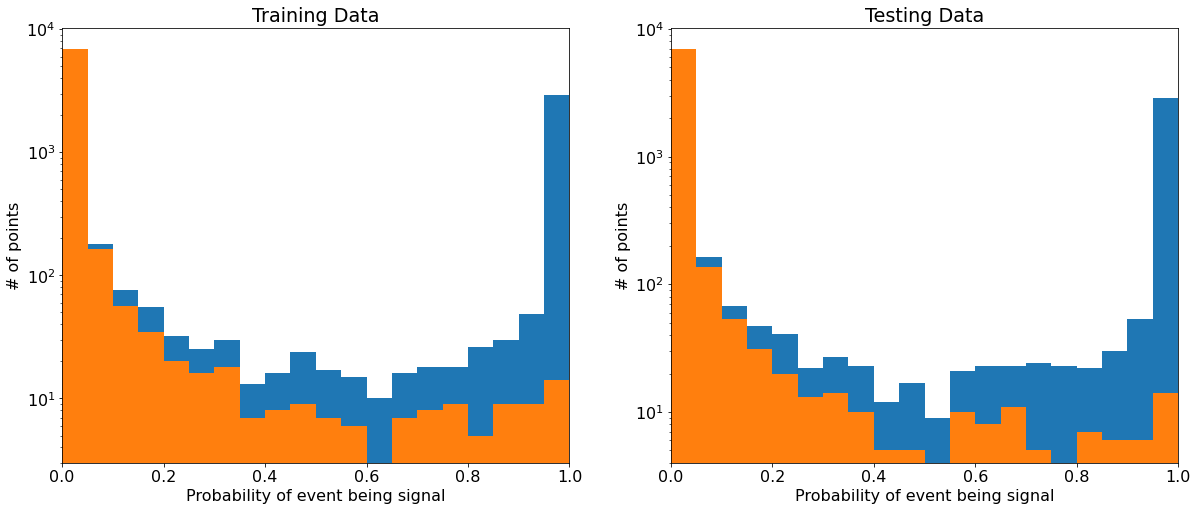

In [25]:
from matplotlib import pyplot
import matplotlib
matplotlib.rcParams['font.size'] = 16

trainprobs = model.predict_proba(training_data)[...,1]
testprobs = model.predict_proba(test_data)[...,1]

pyplot.figure(figsize = (20,8))
pyplot.subplot(1,2,1)
pyplot.title('Training Data')
pyplot.hist([np.extract(classes==0, trainprobs), np.extract(classes==1, trainprobs)], bins = 20,stacked=True, color=['tab:orange', 'tab:blue'])
pyplot.xlabel('Probability of event being signal')
pyplot.ylabel('# of points')
pyplot.yscale("log")
pyplot.xlim(0,1)


pyplot.subplot(1,2,2)
pyplot.title('Testing Data')
pyplot.hist([np.extract(classes==0, testprobs), np.extract(classes==1, testprobs)], bins = 20,stacked=True, color=['tab:orange', 'tab:blue'])
pyplot.xlabel('Probability of event being signal')
pyplot.ylabel('# of points')
pyplot.yscale("log")
pyplot.xlim(0,1)

In [27]:
#Period A
ATLASfileA = ROOT.TFile.Open("http://opendata.cern.ch/eos/opendata/atlas/OutreachDatasets/2020-01-22/2lep/Data/data_A.2lep.root")
ATLASA = ATLASfileA.Get("mini")
print(ATLASA.GetEntries(), " Entries for signal")

#Period B
ATLASfileB = ROOT.TFile.Open("http://opendata.cern.ch/eos/opendata/atlas/OutreachDatasets/2020-01-22/2lep/Data/data_B.2lep.root")
ATLASB = ATLASfileB.Get("mini")
print(ATLASB.GetEntries(), " Entries for signal")

#Period C
ATLASfileC = ROOT.TFile.Open("http://opendata.cern.ch/eos/opendata/atlas/OutreachDatasets/2020-01-22/2lep/Data/data_C.2lep.root")
ATLASC = ATLASfileC.Get("mini")
print(ATLASC.GetEntries(), " Entries for signal")

#Period D
ATLASfileD = ROOT.TFile.Open("http://opendata.cern.ch/eos/opendata/atlas/OutreachDatasets/2020-01-22/2lep/Data/data_D.2lep.root")
ATLASD = ATLASfileD.Get("mini")
print(ATLASD.GetEntries(), " Entries for signal")

668152  Entries for signal
2459370  Entries for signal
3587872  Entries for signal
5490396  Entries for signal


In [28]:
ATLAS_met = []
ATLAS_mll = []
ATLAS_mt2 = []

filter(ATLASA,ATLAS_met,ATLAS_mll,ATLAS_mt2)

loading data now
Event  10000 out of  668152
Event  20000 out of  668152
Event  30000 out of  668152
Event  40000 out of  668152
Event  50000 out of  668152
Event  60000 out of  668152
Event  70000 out of  668152
Event  80000 out of  668152
Event  90000 out of  668152
Event  100000 out of  668152
Event  110000 out of  668152
Event  120000 out of  668152
Event  130000 out of  668152
Event  140000 out of  668152
Event  150000 out of  668152
Event  160000 out of  668152
Event  170000 out of  668152
Event  180000 out of  668152
Event  190000 out of  668152
Event  200000 out of  668152
Event  210000 out of  668152
Event  220000 out of  668152
Event  230000 out of  668152
Event  240000 out of  668152
Event  250000 out of  668152
Event  260000 out of  668152
Event  270000 out of  668152
Event  280000 out of  668152
Event  290000 out of  668152
Event  300000 out of  668152
Event  310000 out of  668152
Event  320000 out of  668152
Event  330000 out of  668152
Event  340000 out of  668152
Event 

In [29]:
filter(ATLASB,ATLAS_met,ATLAS_mll,ATLAS_mt2)# Scales Atlas data

loading data now
Event  10000 out of  2459370
Event  20000 out of  2459370
Event  30000 out of  2459370
Event  40000 out of  2459370
Event  50000 out of  2459370
Event  60000 out of  2459370
Event  70000 out of  2459370
Event  80000 out of  2459370
Event  90000 out of  2459370
Event  100000 out of  2459370
Event  110000 out of  2459370
Event  120000 out of  2459370
Event  130000 out of  2459370
Event  140000 out of  2459370
Event  150000 out of  2459370
Event  160000 out of  2459370
Event  170000 out of  2459370
Event  180000 out of  2459370
Event  190000 out of  2459370
Event  200000 out of  2459370
Event  210000 out of  2459370
Event  220000 out of  2459370
Event  230000 out of  2459370
Event  240000 out of  2459370
Event  250000 out of  2459370
Event  260000 out of  2459370
Event  270000 out of  2459370
Event  280000 out of  2459370
Event  290000 out of  2459370
Event  300000 out of  2459370
Event  310000 out of  2459370
Event  320000 out of  2459370
Event  330000 out of  2459370
Ev

In [30]:
filter(ATLASC,ATLAS_met,ATLAS_mll,ATLAS_mt2)# Scales Atlas data

loading data now
Event  10000 out of  3587872
Event  20000 out of  3587872
Event  30000 out of  3587872
Event  40000 out of  3587872
Event  50000 out of  3587872
Event  60000 out of  3587872
Event  70000 out of  3587872
Event  80000 out of  3587872
Event  90000 out of  3587872
Event  100000 out of  3587872
Event  110000 out of  3587872
Event  120000 out of  3587872
Event  130000 out of  3587872
Event  140000 out of  3587872
Event  150000 out of  3587872
Event  160000 out of  3587872
Event  170000 out of  3587872
Event  180000 out of  3587872
Event  190000 out of  3587872
Event  200000 out of  3587872
Event  210000 out of  3587872
Event  220000 out of  3587872
Event  230000 out of  3587872
Event  240000 out of  3587872
Event  250000 out of  3587872
Event  260000 out of  3587872
Event  270000 out of  3587872
Event  280000 out of  3587872
Event  290000 out of  3587872
Event  300000 out of  3587872
Event  310000 out of  3587872
Event  320000 out of  3587872
Event  330000 out of  3587872
Ev

Event  2690000 out of  3587872
Event  2700000 out of  3587872
Event  2710000 out of  3587872
Event  2720000 out of  3587872
Event  2730000 out of  3587872
Event  2740000 out of  3587872
Event  2750000 out of  3587872
Event  2760000 out of  3587872
Event  2770000 out of  3587872
Event  2780000 out of  3587872
Event  2790000 out of  3587872
Event  2800000 out of  3587872
Event  2810000 out of  3587872
Event  2820000 out of  3587872
Event  2830000 out of  3587872
Event  2840000 out of  3587872
Event  2850000 out of  3587872
Event  2860000 out of  3587872
Event  2870000 out of  3587872
Event  2880000 out of  3587872
Event  2890000 out of  3587872
Event  2900000 out of  3587872
Event  2910000 out of  3587872
Event  2920000 out of  3587872
Event  2930000 out of  3587872
Event  2940000 out of  3587872
Event  2950000 out of  3587872
Event  2960000 out of  3587872
Event  2970000 out of  3587872
Event  2980000 out of  3587872
Event  2990000 out of  3587872
Event  3000000 out of  3587872
Event  3

In [31]:
filter(ATLASD,ATLAS_met,ATLAS_mll,ATLAS_mt2)# Scales Atlas data

loading data now
Event  10000 out of  5490396
Event  20000 out of  5490396
Event  30000 out of  5490396
Event  40000 out of  5490396
Event  50000 out of  5490396
Event  60000 out of  5490396
Event  70000 out of  5490396
Event  80000 out of  5490396
Event  90000 out of  5490396
Event  100000 out of  5490396
Event  110000 out of  5490396
Event  120000 out of  5490396
Event  130000 out of  5490396
Event  140000 out of  5490396
Event  150000 out of  5490396
Event  160000 out of  5490396
Event  170000 out of  5490396
Event  180000 out of  5490396
Event  190000 out of  5490396
Event  200000 out of  5490396
Event  210000 out of  5490396
Event  220000 out of  5490396
Event  230000 out of  5490396
Event  240000 out of  5490396
Event  250000 out of  5490396
Event  260000 out of  5490396
Event  270000 out of  5490396
Event  280000 out of  5490396
Event  290000 out of  5490396
Event  300000 out of  5490396
Event  310000 out of  5490396
Event  320000 out of  5490396
Event  330000 out of  5490396
Ev

Event  2690000 out of  5490396
Event  2700000 out of  5490396
Event  2710000 out of  5490396
Event  2720000 out of  5490396
Event  2730000 out of  5490396
Event  2740000 out of  5490396
Event  2750000 out of  5490396
Event  2760000 out of  5490396
Event  2770000 out of  5490396
Event  2780000 out of  5490396
Event  2790000 out of  5490396
Event  2800000 out of  5490396
Event  2810000 out of  5490396
Event  2820000 out of  5490396
Event  2830000 out of  5490396
Event  2840000 out of  5490396
Event  2850000 out of  5490396
Event  2860000 out of  5490396
Event  2870000 out of  5490396
Event  2880000 out of  5490396
Event  2890000 out of  5490396
Event  2900000 out of  5490396
Event  2910000 out of  5490396
Event  2920000 out of  5490396
Event  2930000 out of  5490396
Event  2940000 out of  5490396
Event  2950000 out of  5490396
Event  2960000 out of  5490396
Event  2970000 out of  5490396
Event  2980000 out of  5490396
Event  2990000 out of  5490396
Event  3000000 out of  5490396
Event  3

Event  5340000 out of  5490396
Event  5350000 out of  5490396
Event  5360000 out of  5490396
Event  5370000 out of  5490396
Event  5380000 out of  5490396
Event  5390000 out of  5490396
Event  5400000 out of  5490396
Event  5410000 out of  5490396
Event  5420000 out of  5490396
Event  5430000 out of  5490396
Event  5440000 out of  5490396
Event  5450000 out of  5490396
Event  5460000 out of  5490396
Event  5470000 out of  5490396
Event  5480000 out of  5490396
Event  5490000 out of  5490396
Done!


In [34]:
ATLAS_data = np.array(list(zip(ATLAS_met,ATLAS_mll,ATLAS_mt2)))

In [36]:
ATLASprob = model.predict_proba(ATLAS_data)[...,1]


  125664/11143073 [..............................] - ETA: 23:22:40

KeyboardInterrupt: 

In [35]:
Sigprob = model.predict_proba(Sig_data)[...,1]

6527/6527 [==============================] - 52s 8ms/step


In [37]:
Bkgprob = model.predict_proba(Bkg_data)[...,1]

  65760/7270844 [..............................] - ETA: 15:33:52

KeyboardInterrupt: 

In [49]:
h_bkg = ROOT.TH1F("h_bgs","Met_et",20,0,2000)

h_sig = ROOT.TH1F("h_sig","Met_et",20,0,2000)

h_ATLAS = ROOT.TH1F("h_ATLAS","Met_et",20,0,2000)


Warning in <TDavixFile::Append>: Replacing existing TH1: h_bgs (Potential memory leak).
Warning in <TDavixFile::Append>: Replacing existing TH1: h_sig (Potential memory leak).
Warning in <TDavixFile::Append>: Replacing existing TH1: h_ATLAS (Potential memory leak).


In [50]:
for i in range(len(Sigprob)):
    if(Sigprob[i] > 0.85):
        h_sig.Fill(sig_met_et[i])

for i in range(len(Bkgprob)):
    if(Bkgprob[i] > 0.85):
        h_bkg.Fill(bkg_met[i])


for i in range(len(ATLAS_met)):
    if(ATLASprob[i] > 0.85):
        h_ATLAS.Fill(ATLAS_met[i])
        
        

Warning in <TCanvas::Constructor>: Deleting canvas with same name: testCanvas


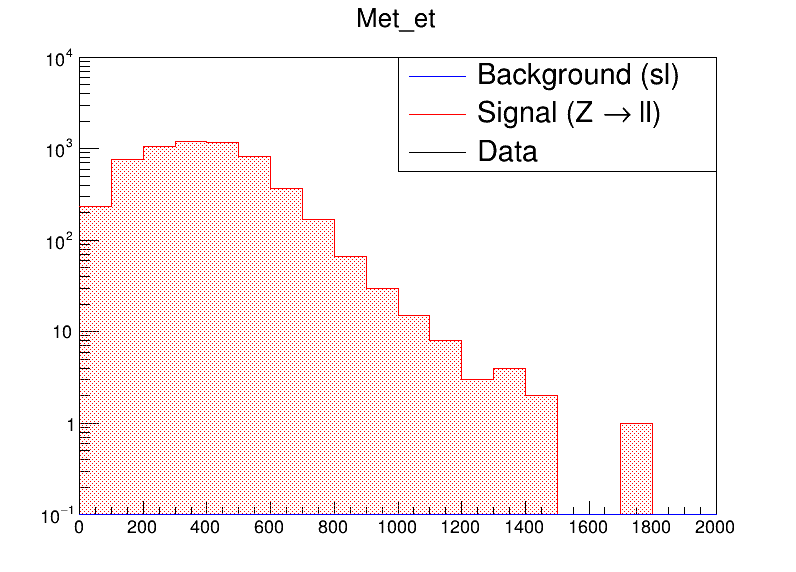

In [51]:
c = ROOT.TCanvas("testCanvas","a first way to plot a variable",800,600)

h_bkg.SetFillStyle(3001)
h_bkg.SetFillColor(4)
h_bkg.SetLineColor(4)

h_sig.SetFillStyle(3003)
h_sig.SetFillColor(2)
h_sig.SetLineColor(2)

h_ATLAS.SetFillStyle(3001)
h_ATLAS.SetFillColor(1)
h_ATLAS.SetLineColor(1)

legend=ROOT.TLegend(0.5,0.7,0.9,0.9)
legend.AddEntry(h_bkg,"Background (sl) ","l")
legend.AddEntry(h_sig,"Signal (Z #rightarrow ll)","l")
legend.AddEntry(h_ATLAS,"Data","l")

h_sig.SetStats(0)
h_bkg.SetStats(0)
h_ATLAS.SetStats(0)


h_ATLAS.SetMaximum(1e4)
h_ATLAS.SetMinimum(1e-1)
h_ATLAS.Draw("E1")
h_sig.Draw("histsame")
h_bkg.Draw("histsame")


legend.Draw()
c.SetLogy()
c.Draw()